In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,confusion_matrix,classification_report,precision_score,recall_score
from sklearn.metrics import ConfusionMatrixDisplay
import scipy.stats as stats
from scipy.stats import chi2
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")

In [4]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 2.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: /Users/dersunscheinyn/my_env/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# what is my main aim?
The objective is to predict whether a client will subscribe to a term deposit (indicated by the variable "y" as "yes" or "no"). 
Your task is to build a predictive model that determines the likelihood of a client subscribing to a term deposit based on the features provided in the dataset.



In [6]:
#loading the csv file as a dataframe
df = pd.read_csv('bank-additional-full.csv',delimiter=';')

In [7]:
#Viewing the first five rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
#finding the data type, column names and total not null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
#renaming the column y as suscribed
df= df.rename(columns={'y':'Suscribed'})

In [10]:
#Checking for duplicates
df.duplicated().sum()

np.int64(12)

In [11]:
#Removing duplicates
df.drop_duplicates(inplace=True)

In [13]:
#checking for missing values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
Suscribed         0
dtype: int64

In [14]:
#finding a summary statistic of  all categorical variables
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,Suscribed
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


In [15]:
#selecting only object data type
object_cols = df.select_dtypes(include='object')

In [16]:
#checking for values of categorical variables to ensure consistency
for col in object_cols:
    print(col+ '\n')
    print(df[col].unique())

job

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital

['married' 'single' 'divorced' 'unknown']
education

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default

['no' 'unknown' 'yes']
housing

['no' 'yes' 'unknown']
loan

['no' 'yes' 'unknown']
contact

['telephone' 'cellular']
month

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week

['mon' 'tue' 'wed' 'thu' 'fri']
poutcome

['nonexistent' 'failure' 'success']
Suscribed

['no' 'yes']


In [17]:
#checking for summary statistics
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [18]:
# selecting only numeric data type
numeric_cols = df.select_dtypes(include='number')

In [19]:
list_of_num_cols =numeric_cols.columns.tolist()

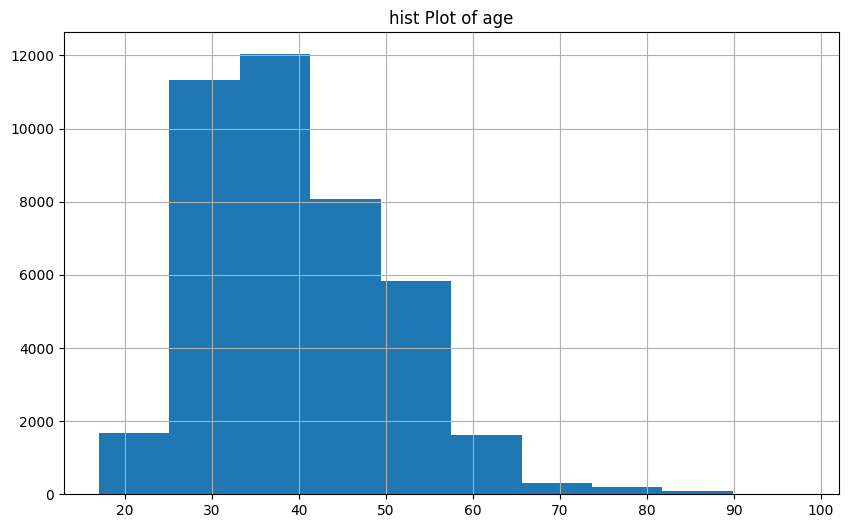

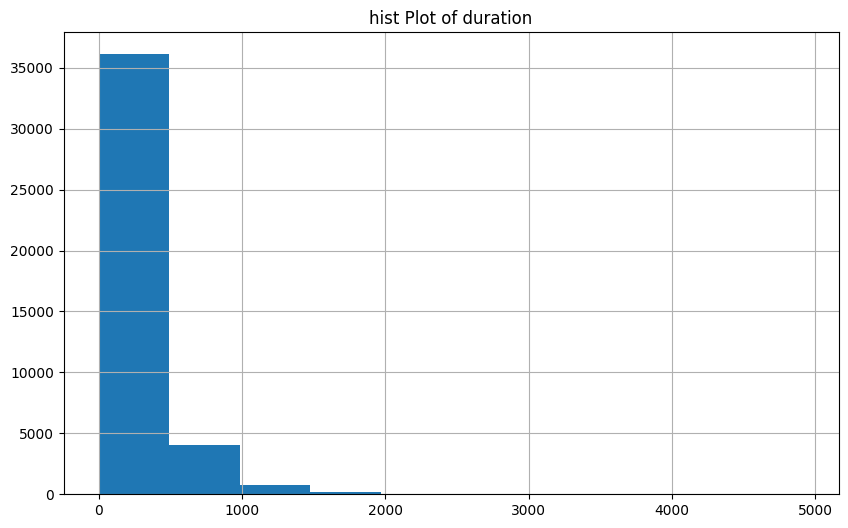

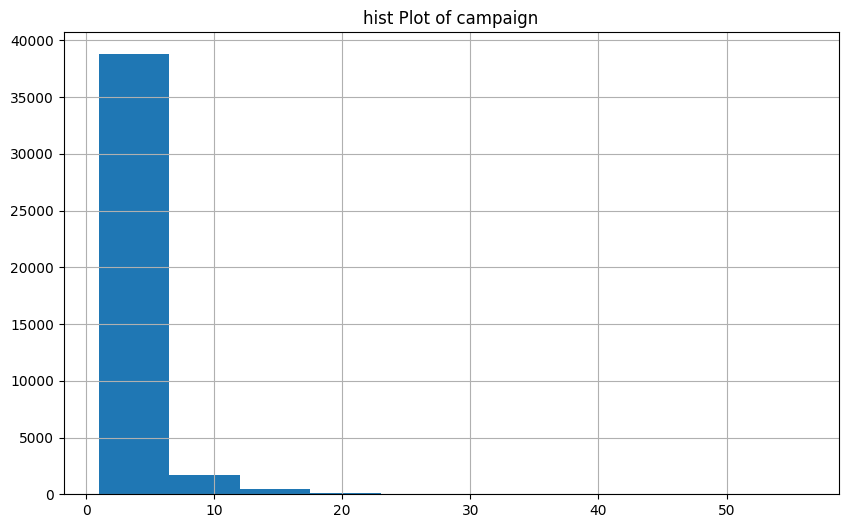

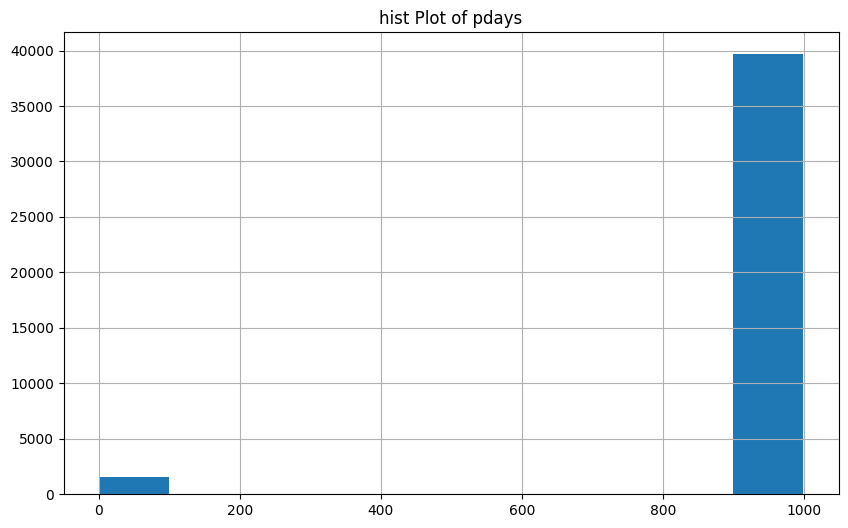

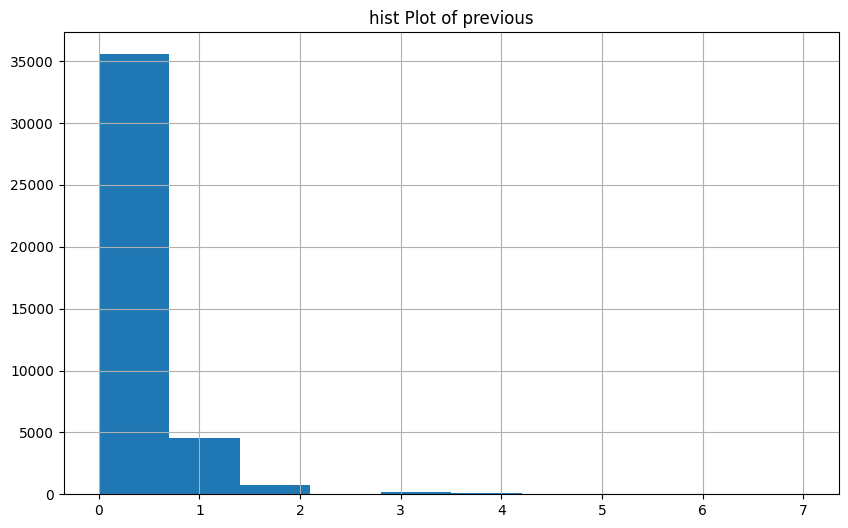

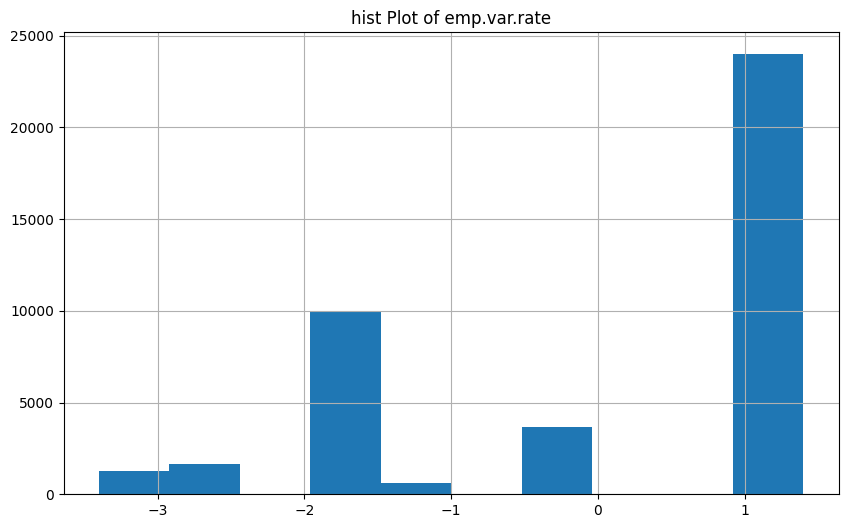

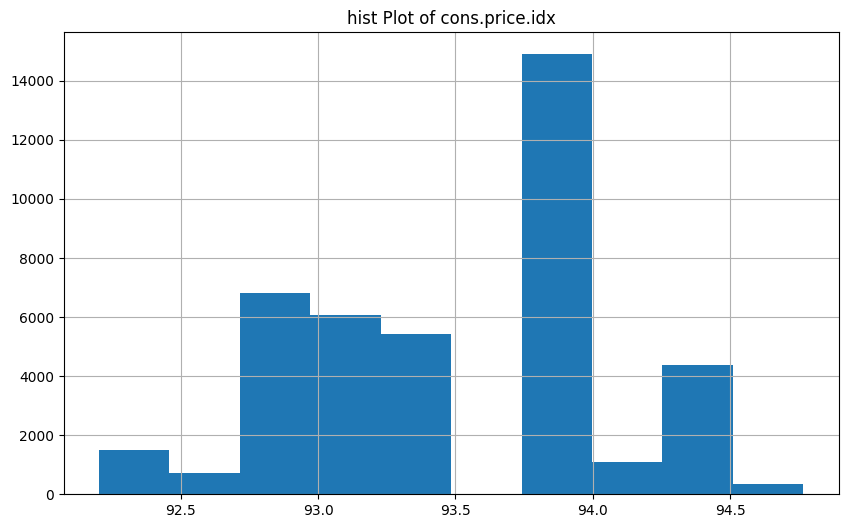

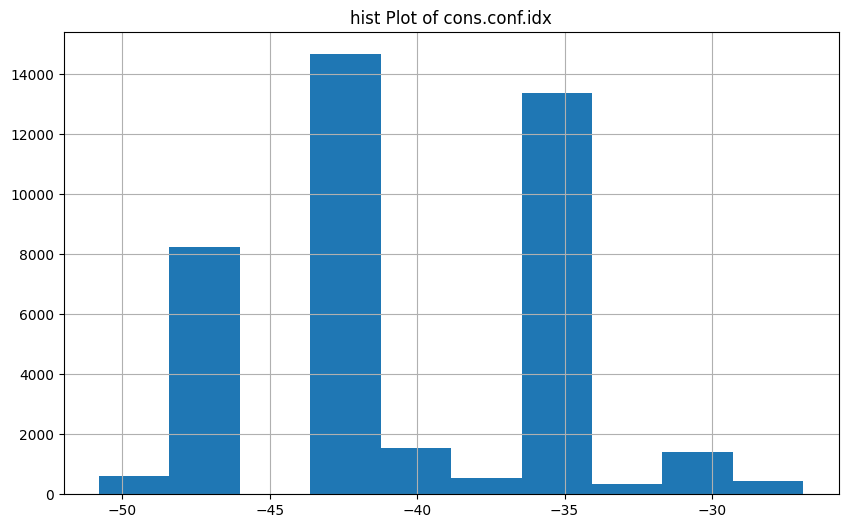

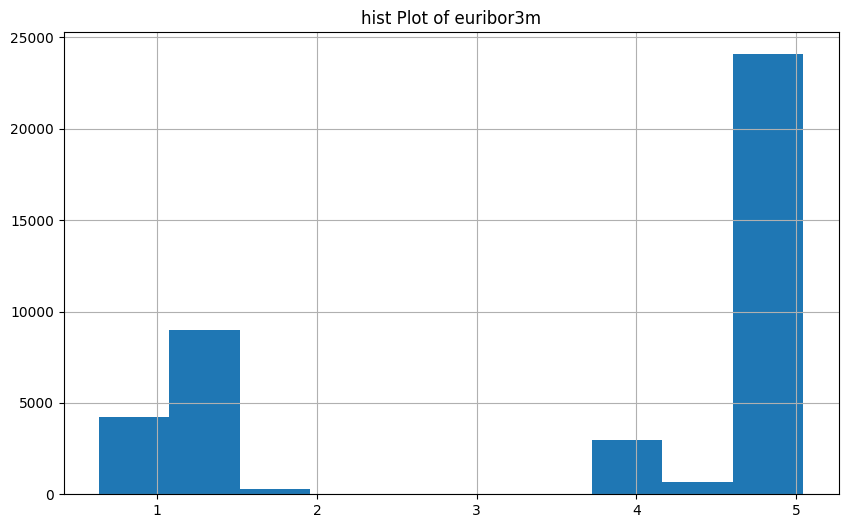

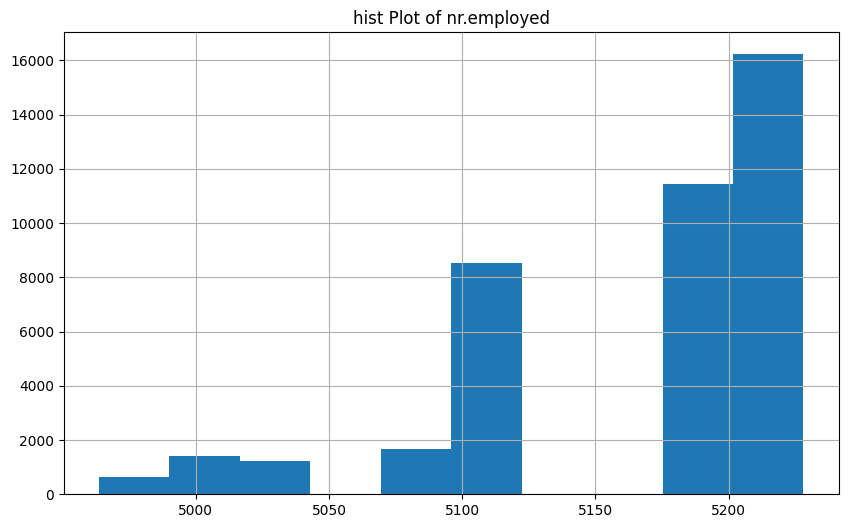

In [21]:
# visualising every numeric  column in numeric cols using a histogram
for column in numeric_cols:
    plt.figure(figsize=(10,6))
    plt.title(f'hist Plot of {column}')
    df[column].hist()

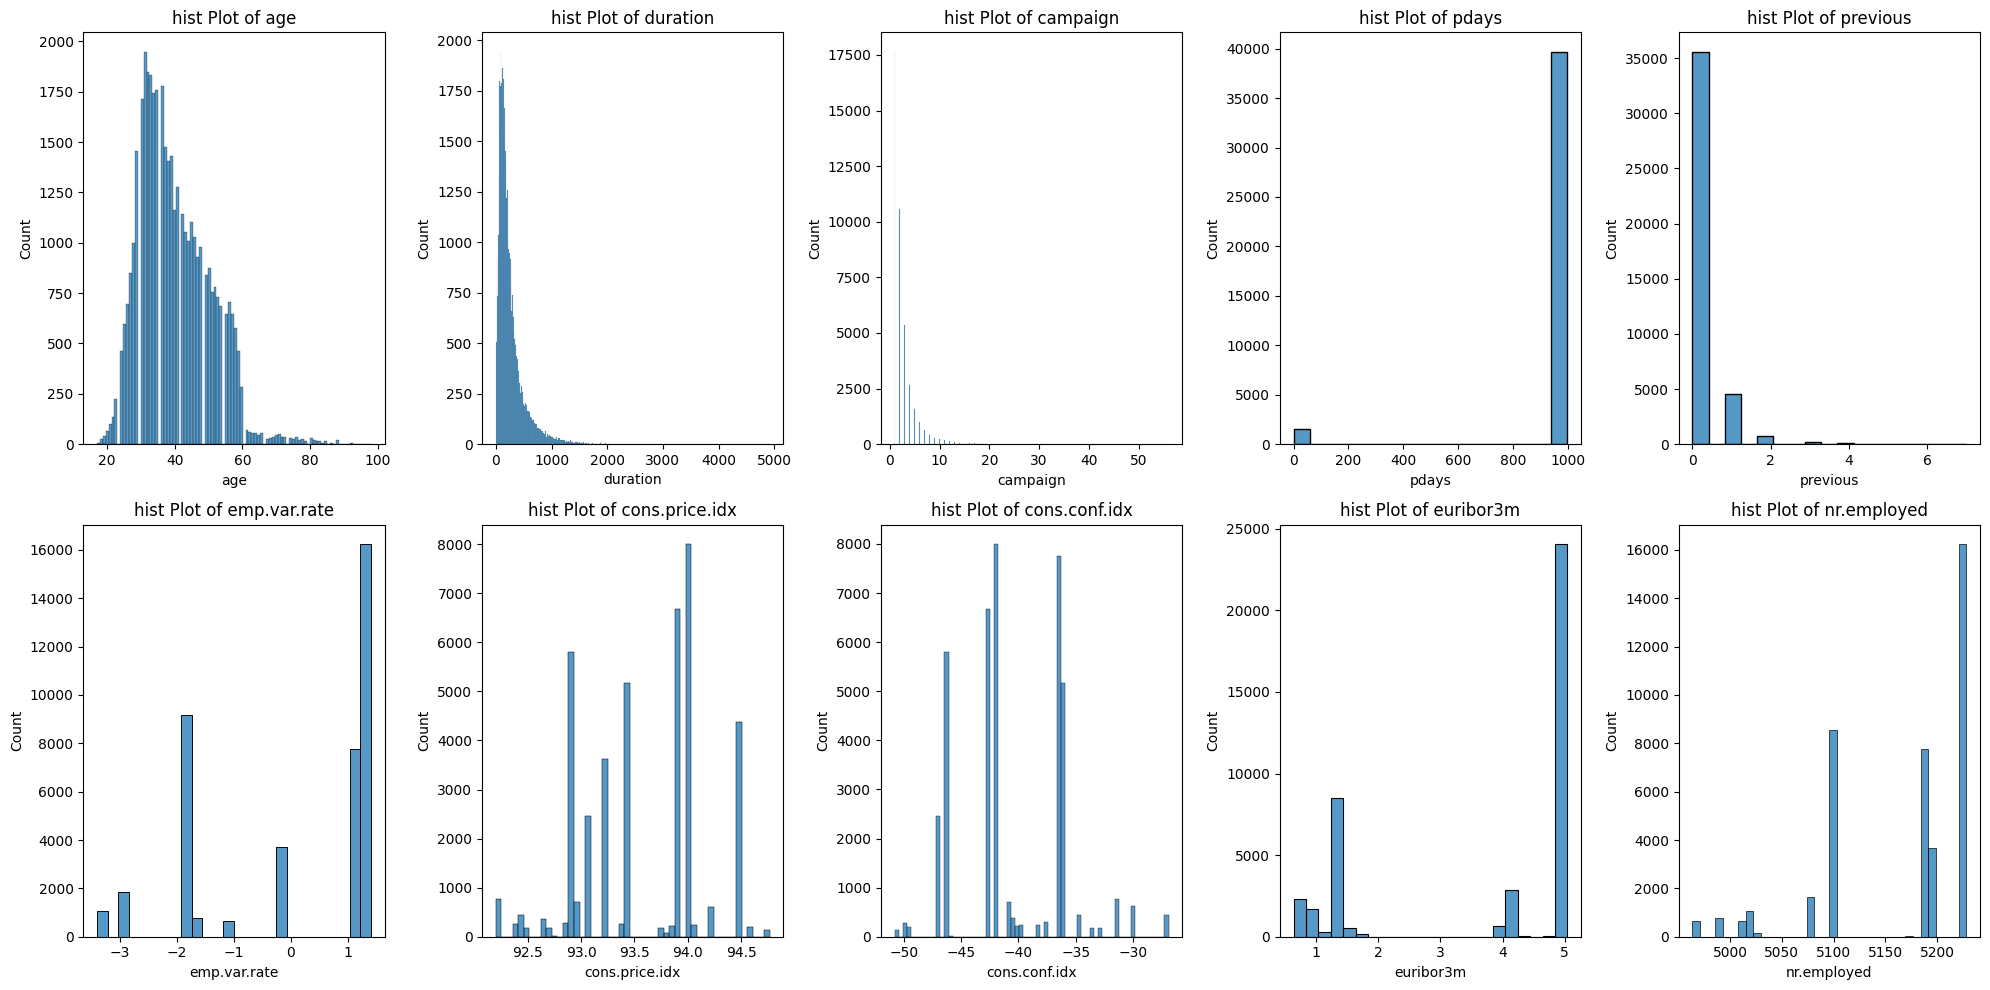

In [22]:
# to keep the visualising simple and easy to compare different subplots , i decided to visualise the columns with  subplots
fig,axes = plt.subplots(2,5,figsize=(20,10))
axes = axes.flatten()
for i,column in enumerate(list_of_num_cols):
    sns.histplot(data=df,x=column,ax=axes[i])
    
    axes[i].set_title(f'hist Plot of {column}')
plt.tight_layout()
plt.show()

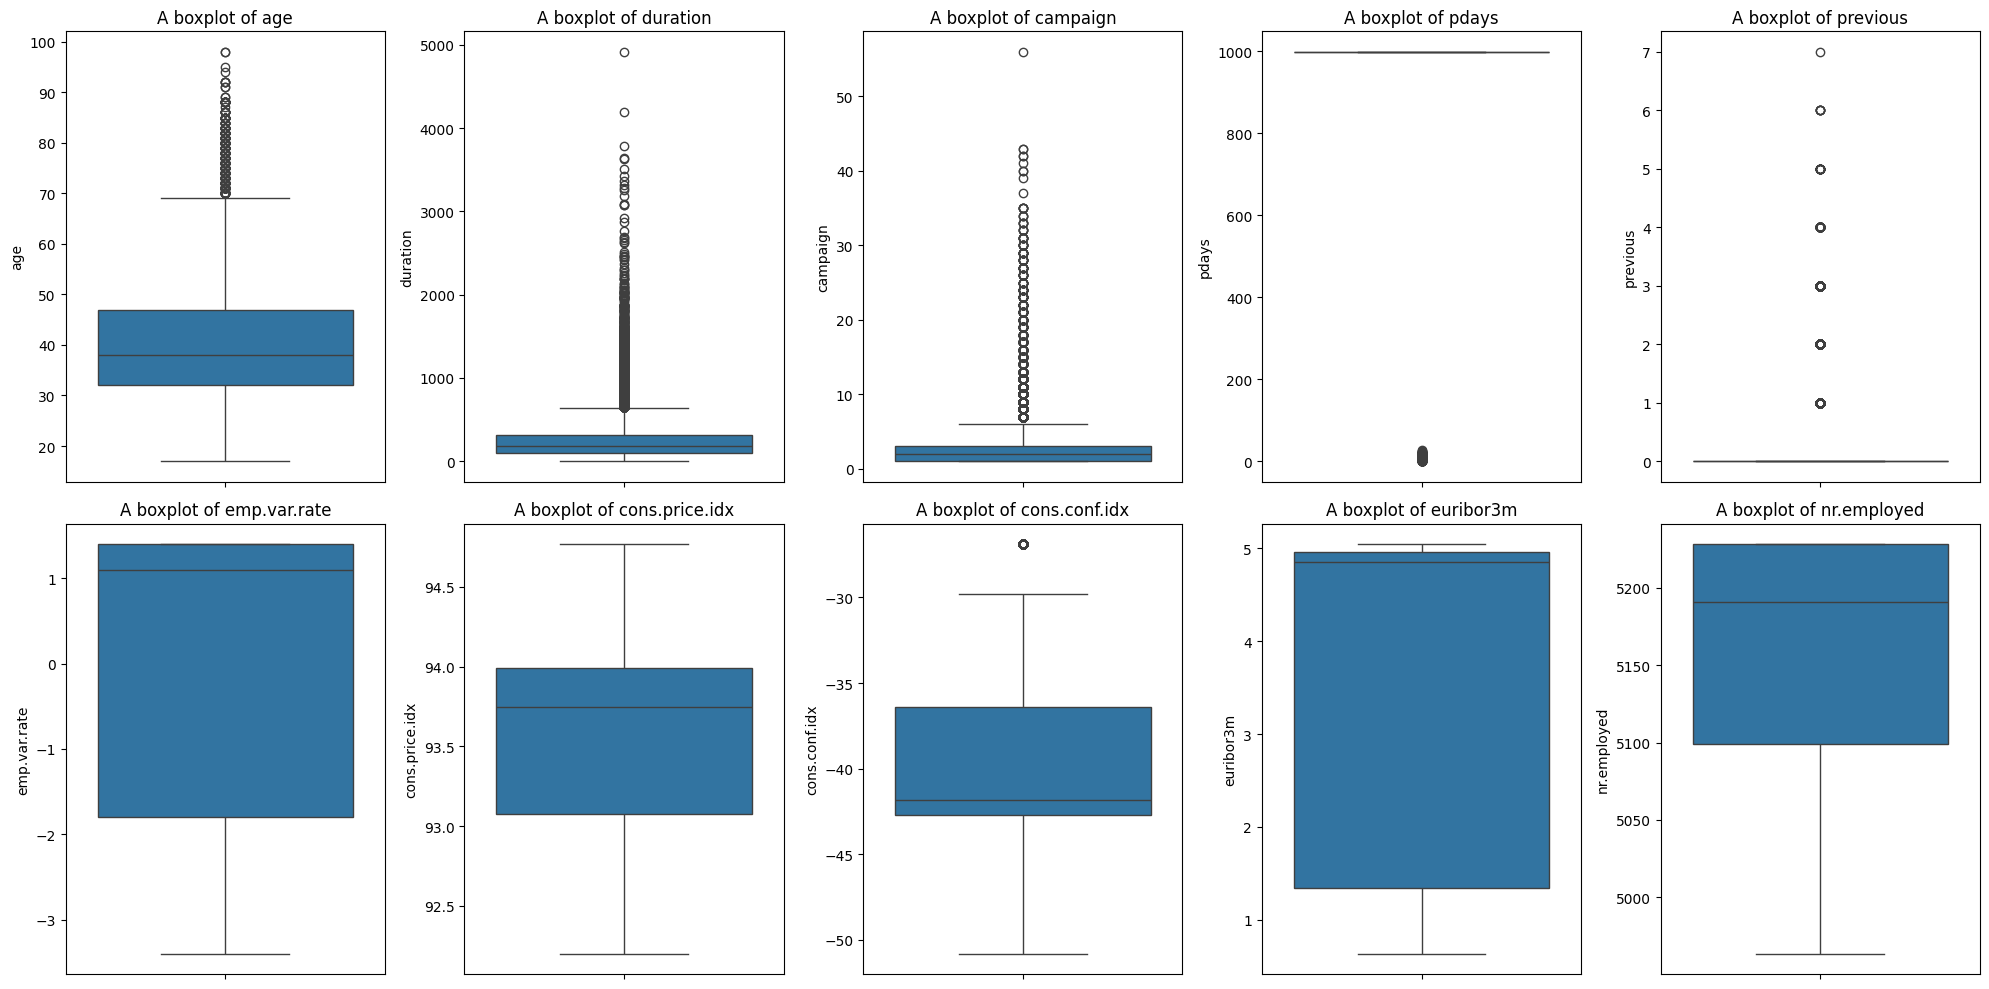

In [23]:
# visualising outliers in numeric columns
fig, axes = plt.subplots(2,5,figsize=(20,10))
axes = axes.flatten()

for i, column in enumerate(list_of_num_cols):
    sns.boxplot(data=df,y=column,ax =axes[i])
    axes[i].set_title(f'A boxplot of {column}')

plt.tight_layout()
plt.show()

In [24]:
# Removing outliers
def remove_outliers_columnwise(df, list_of_num_cols):
    cleaned_df = df.copy()
    
    for col in list_of_num_cols:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Set outliers to NaN, keep all rows
        cleaned_df[col] = cleaned_df[col].where((cleaned_df[col] >= lower) & (cleaned_df[col] <= upper))
    
    return cleaned_df


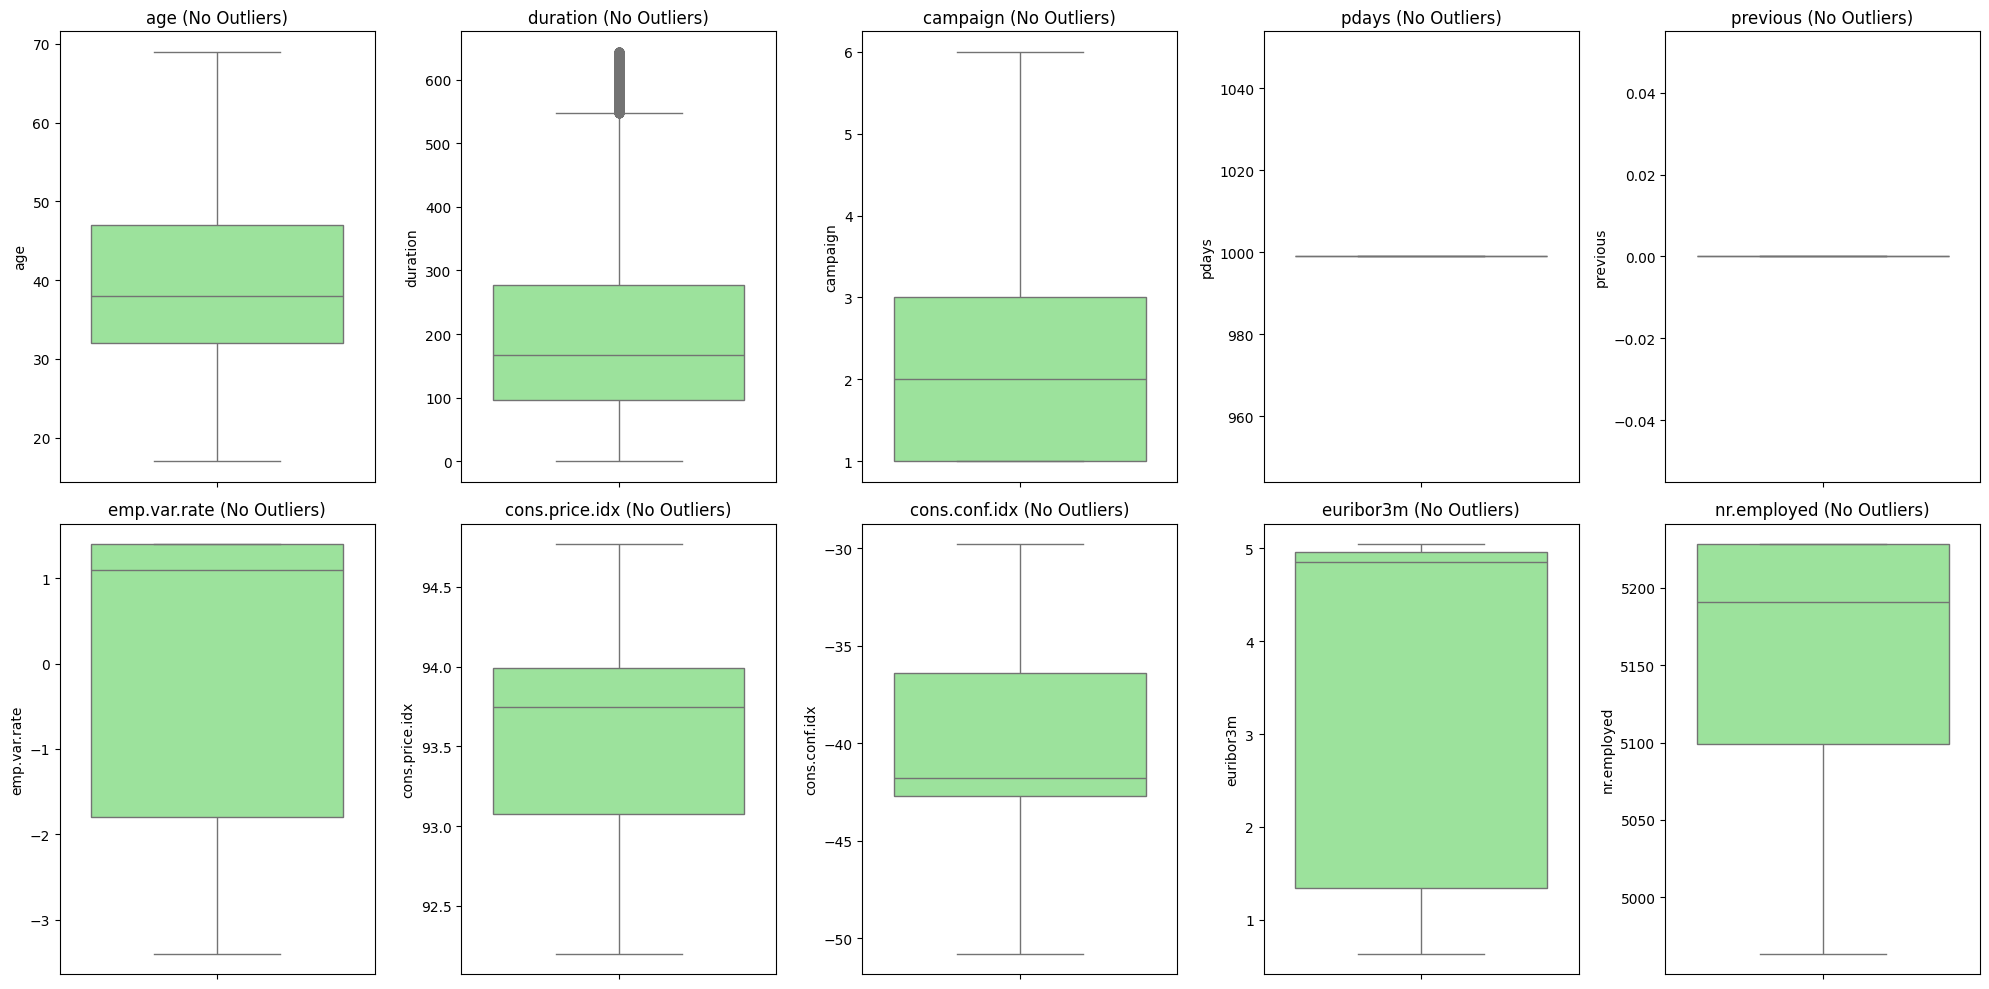

In [25]:
clean_df = remove_outliers_columnwise(df, list_of_num_cols)

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(list_of_num_cols):
    sns.boxplot(data=clean_df, y=col, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'{col} (No Outliers)')

plt.tight_layout()
plt.show()


In [26]:
categorical_columns = df.select_dtypes(include='O').drop('Suscribed',axis=1)
categorical_columns =categorical_columns.columns.tolist()
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [27]:
#performing a chi-square independent test to see if there is a relationship between categorical variables and target colum n
for col in categorical_columns:
    print( col +'\n')
    cross_tab = pd.crosstab( df[col],columns=df['Suscribed'])
    significance_level = 0.05
    calculated_chi_statistic, p_value, dof, expected = stats.chi2_contingency(cross_tab.values,correction= False)
    
    Critical_value = stats.chi2.ppf(q=1-significance_level,df =dof)

    if calculated_chi_statistic > Critical_value:
        print('Reject Null Hypothesis')
    else:
        print('Fail to reject Null hypothesis' +'\n')

    if p_value <= significance_level:
        print('Reject Null Hypothesis ')
    else:
        print('Fail to reject Null hypothesis')
    

job

Reject Null Hypothesis
Reject Null Hypothesis 
marital

Reject Null Hypothesis
Reject Null Hypothesis 
education

Reject Null Hypothesis
Reject Null Hypothesis 
default

Reject Null Hypothesis
Reject Null Hypothesis 
housing

Fail to reject Null hypothesis

Fail to reject Null hypothesis
loan

Fail to reject Null hypothesis

Fail to reject Null hypothesis
contact

Reject Null Hypothesis
Reject Null Hypothesis 
month

Reject Null Hypothesis
Reject Null Hypothesis 
day_of_week

Reject Null Hypothesis
Reject Null Hypothesis 
poutcome

Reject Null Hypothesis
Reject Null Hypothesis 


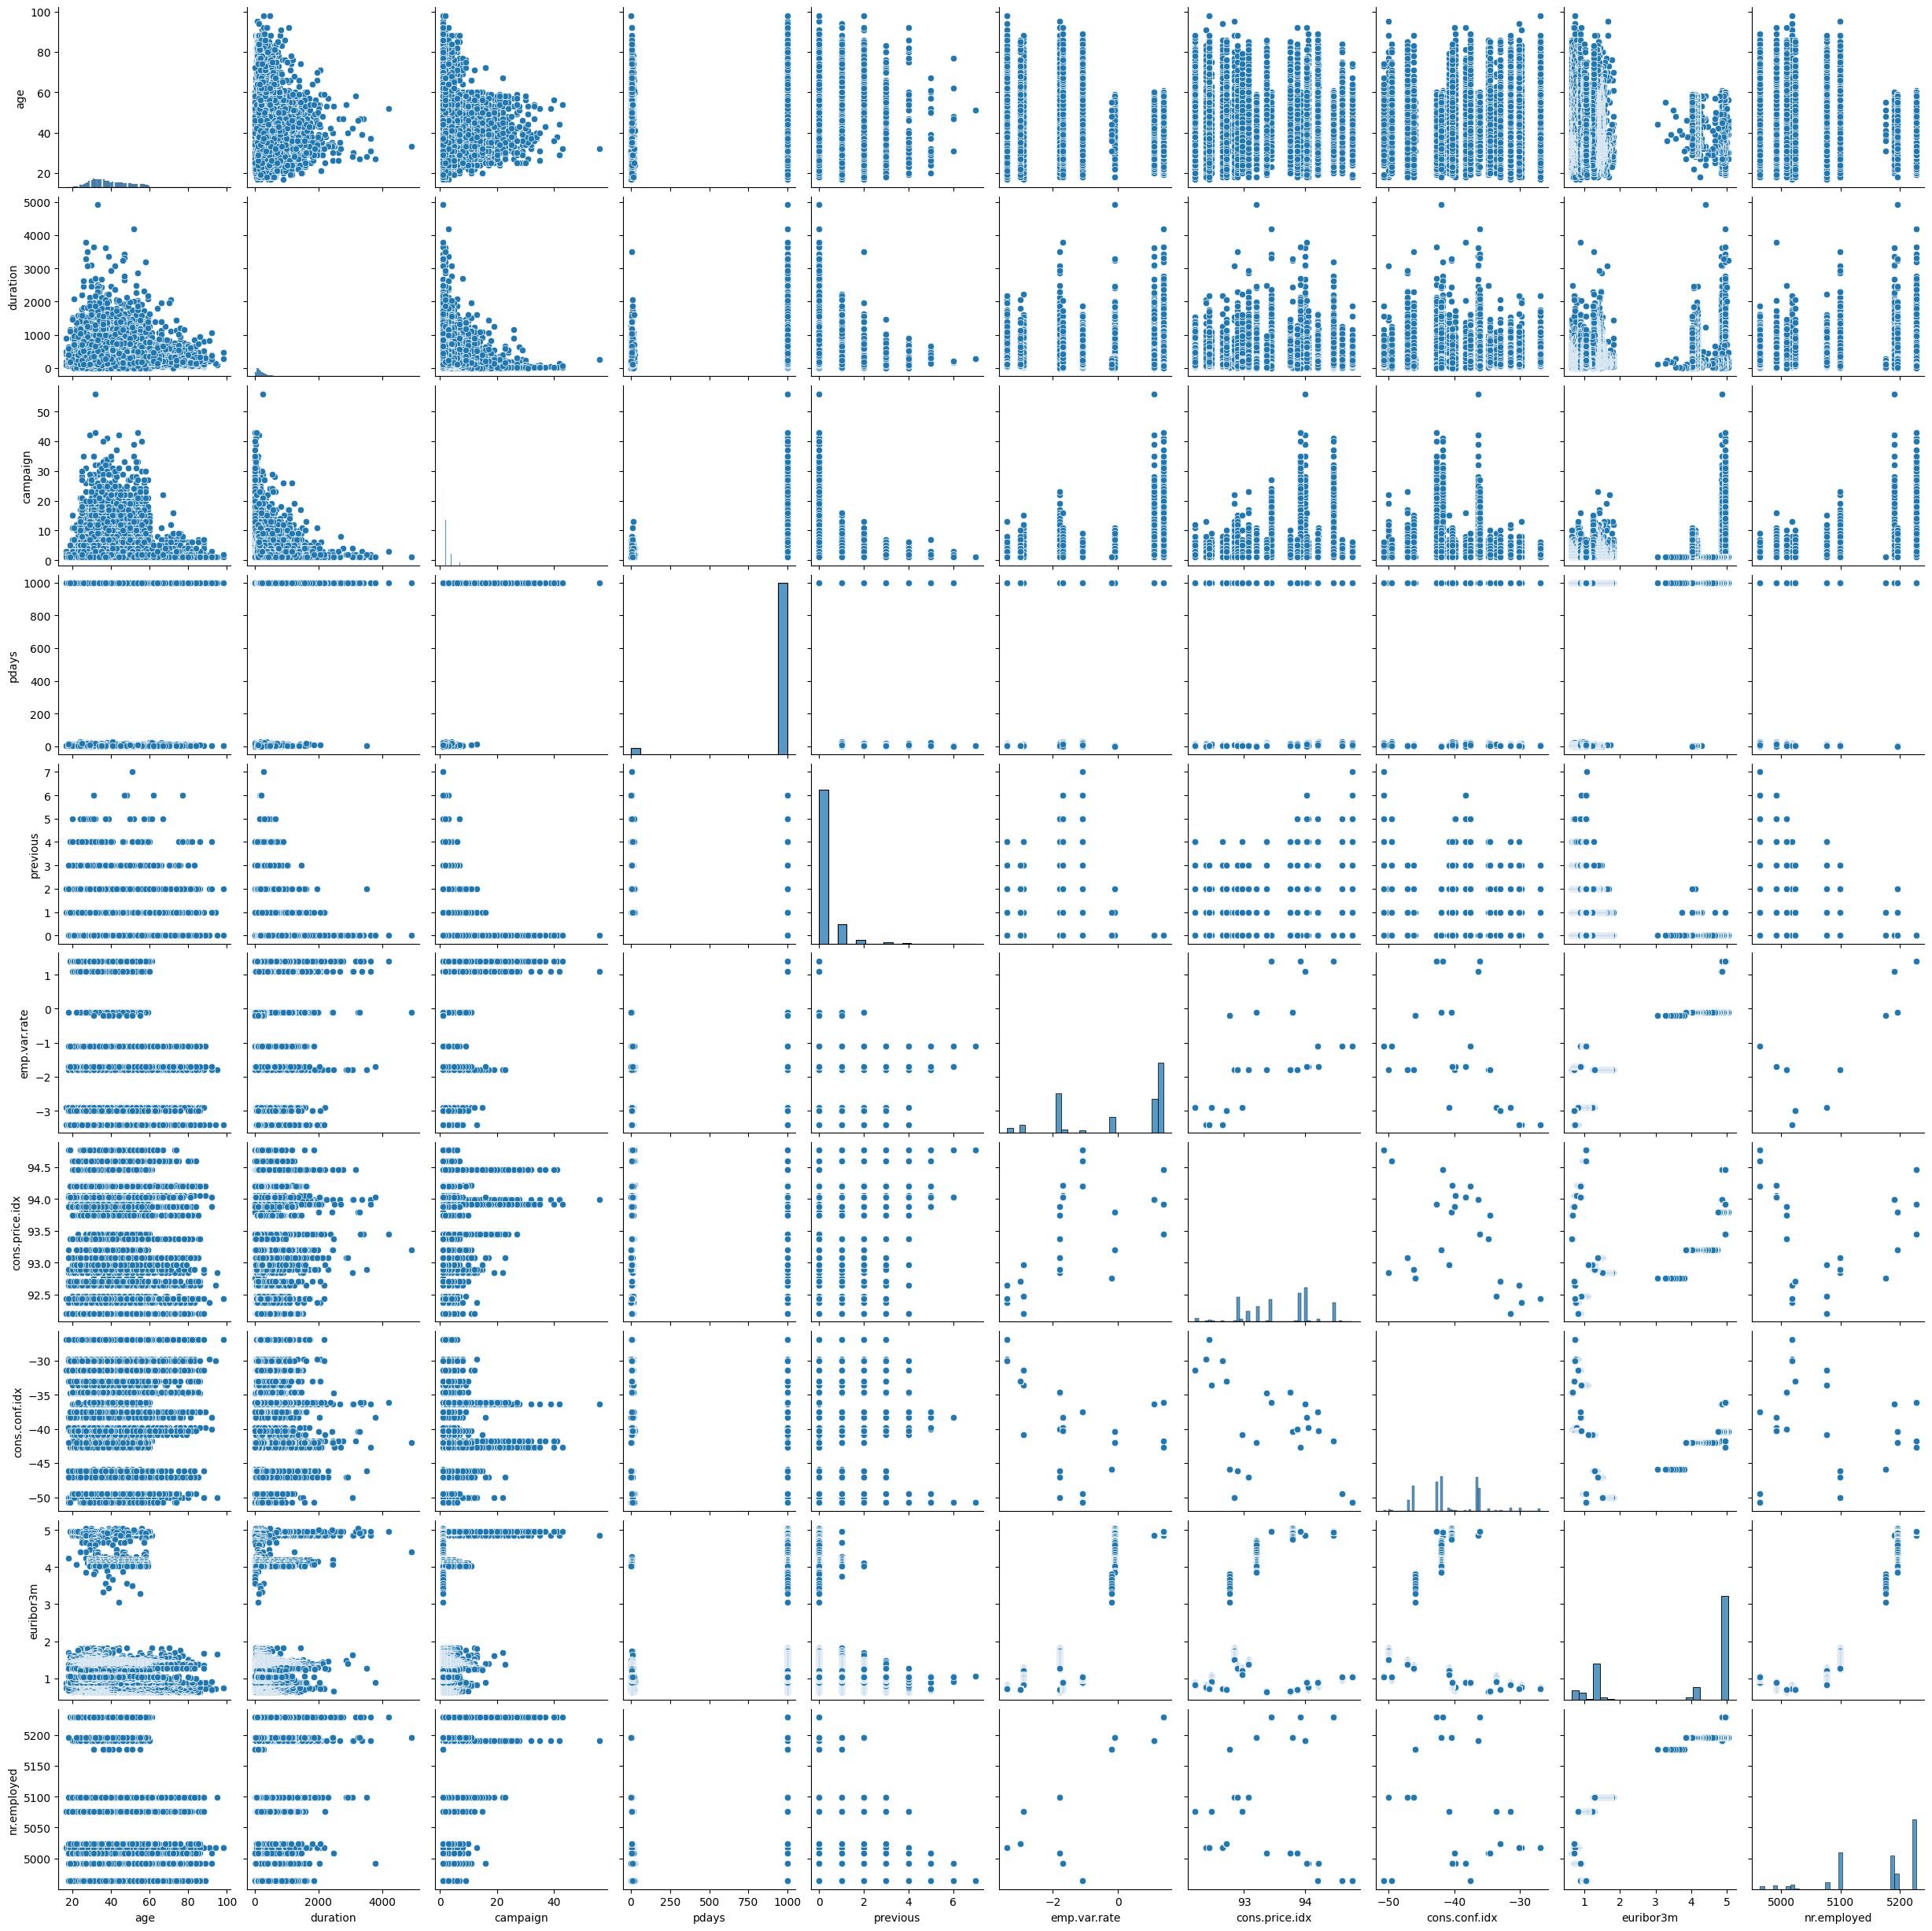

In [28]:
# findiong correlation between 2 categorical columns
sns.pairplot(df)

In [29]:
corr_matrix =df.corr(numeric_only=True)

<Axes: >

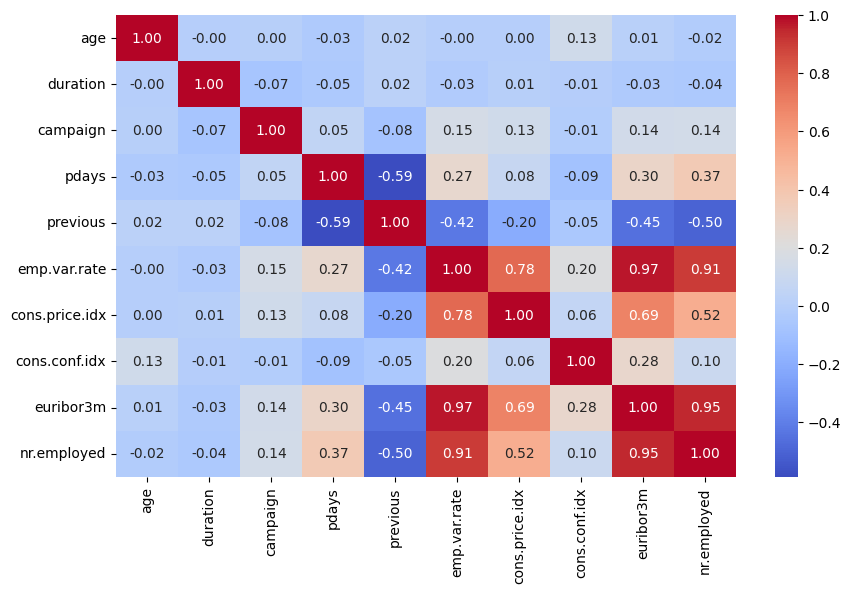

In [30]:
# Visualising correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,fmt='.2f',annot= True,cmap='coolwarm')

In [31]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'Suscribed'],
      dtype='object')

In [32]:
df.rename(columns ={"emp.var.rate":"emp_var_rate",
                   "cons.price.idx":"cons_price_idx",
                   "cons.conf.idx":"cons_conf_idx",
                   "nr.employed":"nr_employed"},inplace= True)

In [33]:
#check for skewness of numeirc variables
df.select_dtypes(include='number').skew()

age               0.784560
duration          3.262808
campaign          4.762044
pdays            -4.921386
previous          3.831396
emp_var_rate     -0.724061
cons_price_idx   -0.230853
cons_conf_idx     0.302876
euribor3m        -0.709194
nr_employed      -1.044317
dtype: float64

In [34]:
#find variance of numeirc variables
df.select_dtypes(include='number').var()

age                 108.590569
duration          67239.249475
campaign              7.674664
pdays             34945.480000
previous              0.244990
emp_var_rate          2.467672
cons_price_idx        0.335055
cons_conf_idx        21.417088
euribor3m             3.008272
nr_employed        5220.259596
dtype: float64

<Axes: xlabel='count', ylabel='Suscribed'>

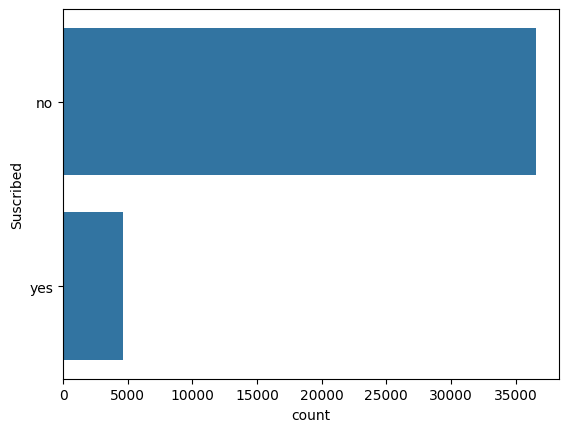

In [35]:
#lets explore distribution of target variable
sns.countplot(data= df['Suscribed'])

In [32]:
# There is class imbalance with regards to the dataset

In [33]:
'''
Subsetting the clients who subscribed  to further analyze why some people subscribed.
'''

'\nSubsetting the clients who subscribed  to further analyze why some people subscribed.\n'

In [36]:
yes_subscription =df[df['Suscribed']=='yes']

In [37]:
#finding the number of rows and columns in the subsetted dataframe
yes_subscription.shape

(4639, 21)

In [38]:
#finding the summary statistic for numeric columns
yes_subscription.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000
mean,40.912266,553.256090,2.051951,791.990946,0.492779,-1.233089,93.354577,-39.791119,2.123362,5095.120069
std,13.838838,401.190736,1.666353,403.439220,0.860406,1.623616,0.676592,6.139657,1.742717,87.581640
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,253.500000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.500000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [39]:
#finding the summary statistic for categorical variables
yes_subscription.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,Suscribed
count,4639,4639,4639,4639,4639,4639,4639,4639,4639,4639,4639
unique,12,4,8,2,3,3,2,10,5,3,1
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,yes
freq,1351,2531,1669,4196,2507,3849,3852,886,1044,3140,4639


In [38]:
'''There are 4639 rows of clients that subscribed out of 41176 
therefore '''

'There are 4639 rows of clients that subscribed out of 41176 \ntherefore '

In [39]:
''' Questions
1. Which month did people subscribe to the most (top 3) and least(bottom 3)
2. What is the education level of clients  who subscribed
3. Which days yield the best outcomes?
4. Did people who took a loan constitute a large portion of clients who subscribed
5. Which job types have the highest and lowest subscription rates?
6. Which contact method (cellular or telephone) results in higher subscription rates?
7. Are younger or older people more likely to subscribe?
Is there an optimal age range where the subscription probability peaks?
8. How do economic indicators impact campaign success?
9. How does call duration influence subscription, and what is the optimal length?
Use duration to determine if longer calls increase conversion.


'''

' Questions\n1. Which month did people subscribe to the most (top 3) and least(bottom 3)\n2. What is the education level of clients  who subscribed\n3. Which days yield the best outcomes?\n4. Did people who took a loan constitute a large portion of clients who subscribed\n5. Which job types have the highest and lowest subscription rates?\n6. Which contact method (cellular or telephone) results in higher subscription rates?\n7. Are younger or older people more likely to subscribe?\nIs there an optimal age range where the subscription probability peaks?\n8. How do economic indicators impact campaign success?\n9. How does call duration influence subscription, and what is the optimal length?\nUse duration to determine if longer calls increase conversion.\n\n\n'

In [40]:
monthly_yes_subscription =yes_subscription.groupby('Suscribed')['month'].value_counts().reset_index()

In [41]:
monthly_yes_subscription

,Suscribed,month,count
0,yes,may,886
1,yes,aug,655
2,yes,jul,648
3,yes,jun,559
4,yes,apr,539
5,yes,nov,416
6,yes,oct,315
7,yes,mar,276
8,yes,sep,256
9,yes,dec,89


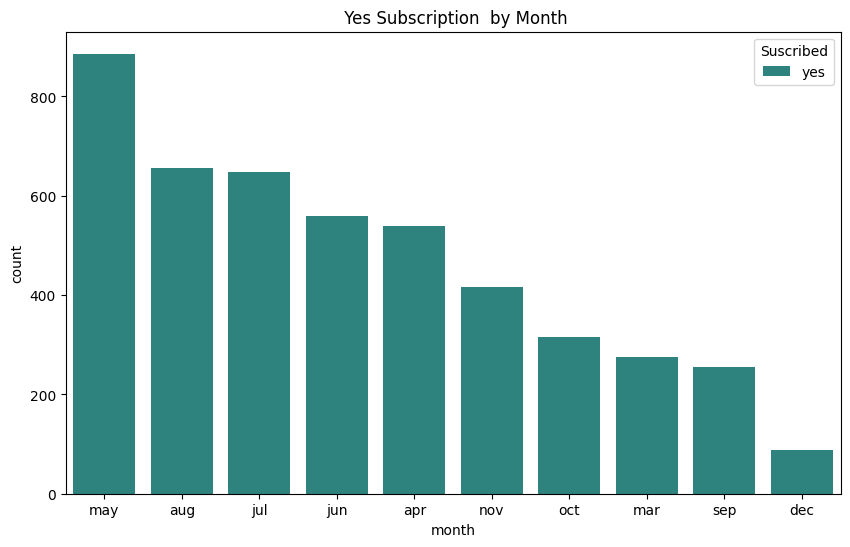

In [42]:
plt.figure(figsize=(10,6))
plt.title(' Yes Subscription  by Month')
sns.barplot(data=monthly_yes_subscription,x='month',y='count',hue='Suscribed',palette='viridis')
plt.show()

In [43]:
subscription_by_month = df.groupby('Suscribed')['month'].value_counts().reset_index()

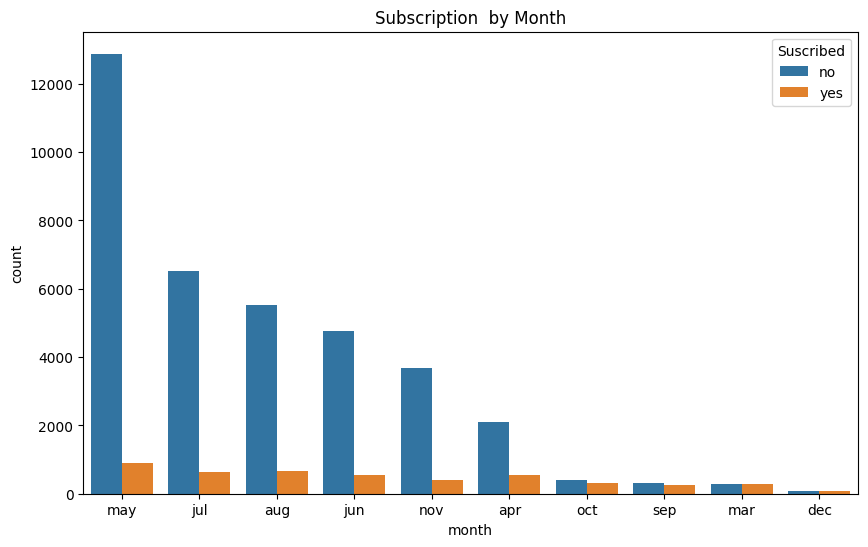

In [44]:
plt.figure(figsize=(10,6))
plt.title('Subscription  by Month')
sns.barplot(data=subscription_by_month,x='month',y='count',hue='Suscribed')
plt.show()

In [45]:
df['month'].value_counts()

month
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [46]:
'''Most of the marketing campaigns were done in May, July, and August. 
So, even though these months had the highest subscriptions,
we can’t confidently say they are the best for marketing. 
Running the same number of campaigns in each month 
would help us see which months actually perform best''' 

'Most of the marketing campaigns were done in May, July, and August. \nSo, even though these months had the highest subscriptions,\nwe can’t confidently say they are the best for marketing. \nRunning the same number of campaigns in each month \nwould help us see which months actually perform best'

In [46]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'Suscribed'],
      dtype='object')

In [47]:
day_of_week_count = df['day_of_week'].value_counts().reset_index().sort_values(by='count',ascending=False)

In [48]:
yes_day_subscription = yes_subscription['day_of_week'].value_counts().reset_index().sort_values(by='count',ascending=False)

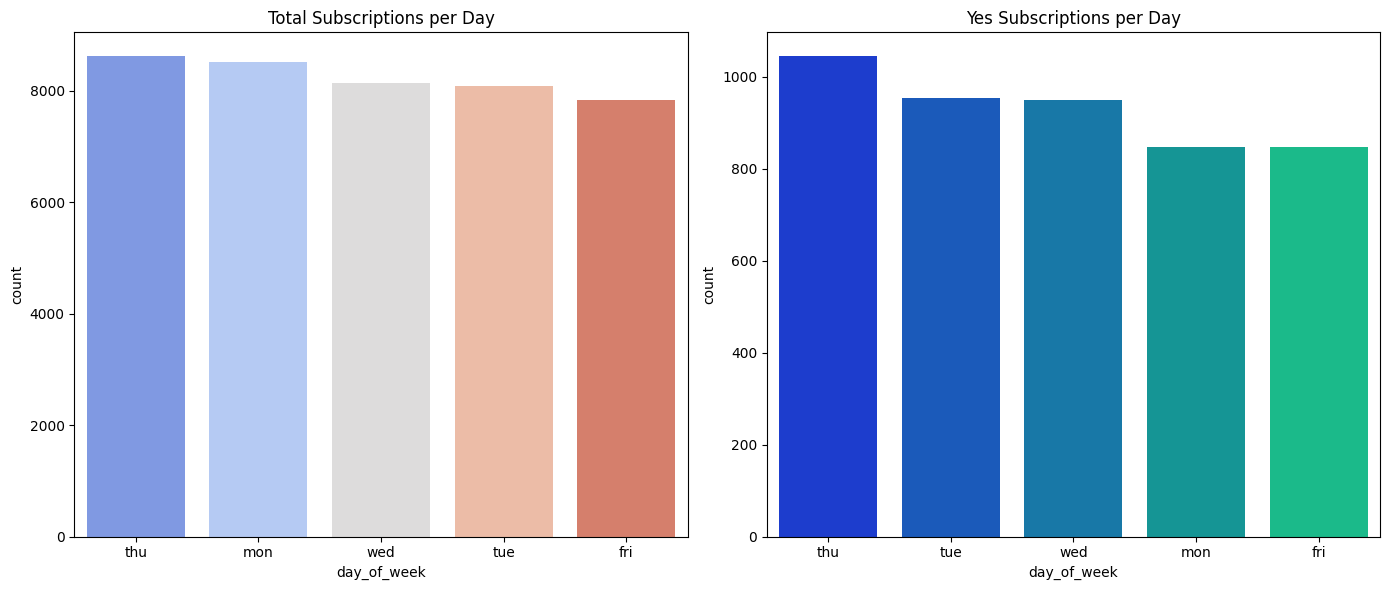

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

sns.barplot(data=day_of_week_count, x='day_of_week', y='count', ax=axes[0],palette='coolwarm')
axes[0].set_title("Total Subscriptions per Day")

sns.barplot(data=yes_day_subscription, x='day_of_week', y='count', ax=axes[1],palette='winter')
axes[1].set_title("Yes Subscriptions per Day")

plt.tight_layout()
plt.show()

In [51]:
''' Note that the diagrams in both sections have been sorted . we realise in the 2nd diagram
tuesday had the second most subscriptions, we realise though the total number of days. 
the best day for marketing is tuesday. monday however performs poorly.'''

' Note that the diagrams in both sections have been sorted . we realise in the 2nd diagram\ntuesday had the second most subscriptions, we realise though the total number of days. \nthe best day for marketing is tuesday. monday however performs poorly.'

In [55]:
df['education'].value_counts().reset_index()

,education,count
0,university.degree,12164
1,high.school,9512
2,basic.9y,6045
3,professional.course,5240
4,basic.4y,4176
5,basic.6y,2291
6,unknown,1730
7,illiterate,18


In [56]:
education_by_subscription =yes_subscription['education'].value_counts().reset_index().sort_values(by='count',ascending = False)

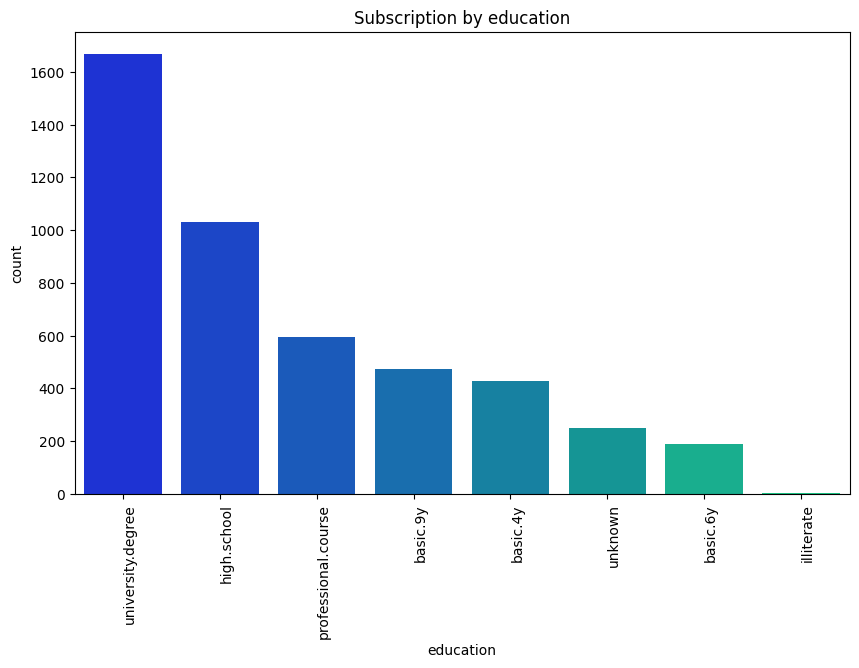

In [57]:

plt.figure(figsize=(10,6))
plt.title('Subscription by education')
sns.barplot(data=education_by_subscription,x='education',y='count',palette='winter')
plt.xticks(rotation= 90,ha='left')
plt.show()

In [55]:
# people with low level of education are more likely to not subscribed

In [58]:
df['loan'].value_counts()

loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64

In [59]:
df.groupby('Suscribed')['loan'].value_counts()

Suscribed  loan   
no         no         30089
           yes         5565
           unknown      883
yes        no          3849
           yes          683
           unknown      107
Name: count, dtype: int64

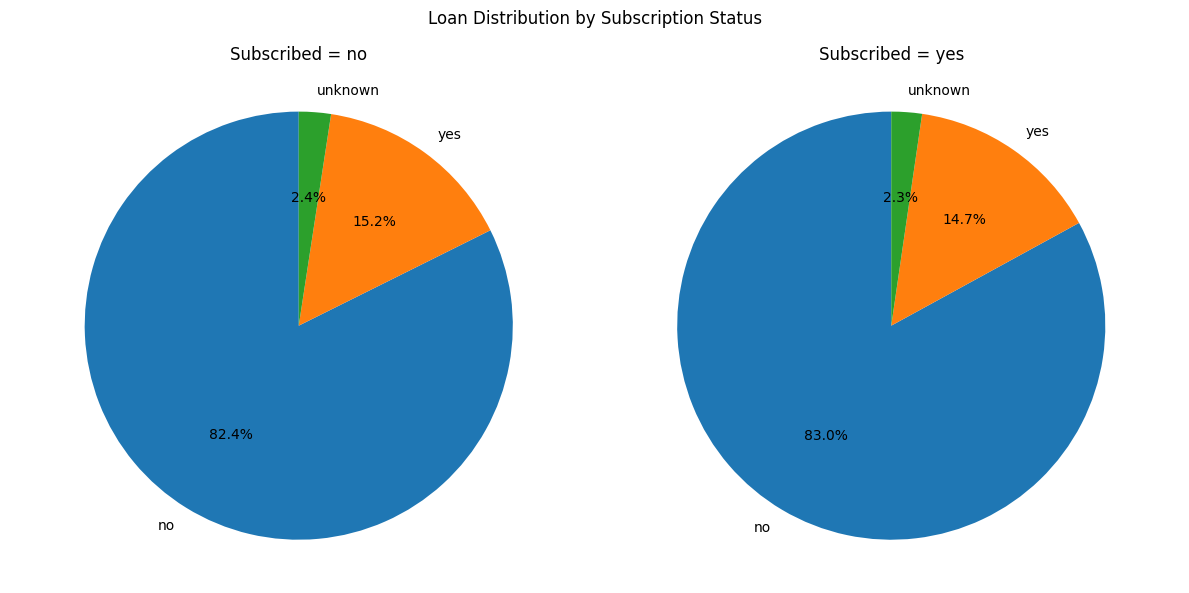

In [60]:

grouped = df.groupby('Suscribed')['loan'].value_counts()

# Extract data for each 'Subscribed' group
no_data = grouped['no']
yes_data = grouped['yes']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Subscribed = no
axes[0].pie(no_data, labels=no_data.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Subscribed = no')
axes[0].axis('equal')

# Plot for Subscribed = yes
axes[1].pie(yes_data, labels=yes_data.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Subscribed = yes')
axes[1].axis('equal')

plt.suptitle('Loan Distribution by Subscription Status')
plt.tight_layout()
plt.show()


In [61]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'Suscribed'],
      dtype='object')

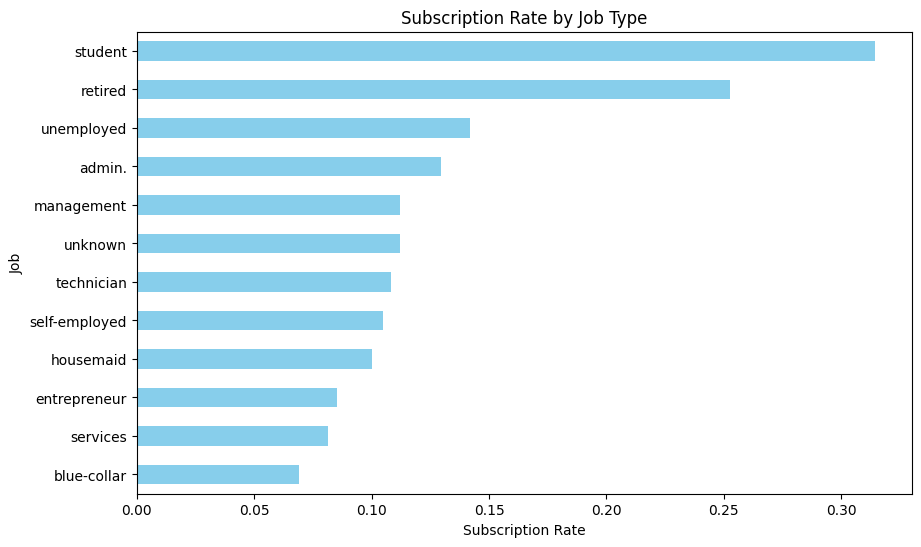

In [62]:
job_subscription = df.groupby('job')['Suscribed'].value_counts(normalize=True).unstack().fillna(0)

# Plot
job_subscription['yes'].sort_values().plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Subscription Rate by Job Type')
plt.xlabel('Subscription Rate')
plt.ylabel('Job')
plt.show()

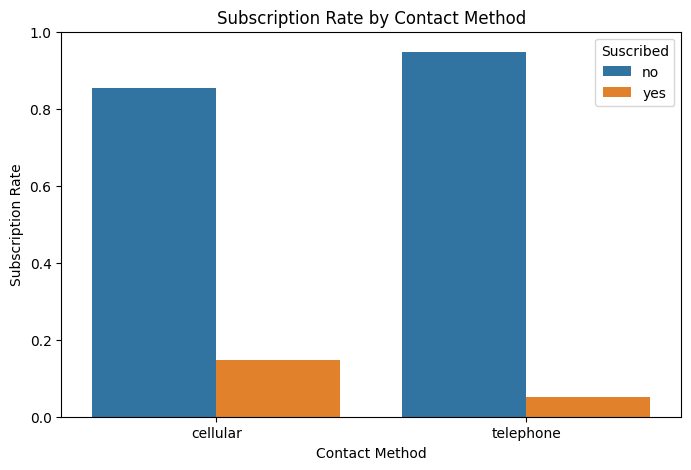

In [63]:
contact_counts = df.groupby(['contact', 'Suscribed']).size().reset_index(name='count')

# Calculate percentages within each contact group
contact_counts['percent'] = contact_counts.groupby('contact')['count'].transform(lambda x: x / x.sum())

# Plot with hue
plt.figure(figsize=(8, 5))
sns.barplot(data=contact_counts, x='contact', y='percent', hue='Suscribed')
plt.title('Subscription Rate by Contact Method')
plt.ylabel('Subscription Rate')
plt.xlabel('Contact Method')
plt.ylim(0, 1)
plt.show()

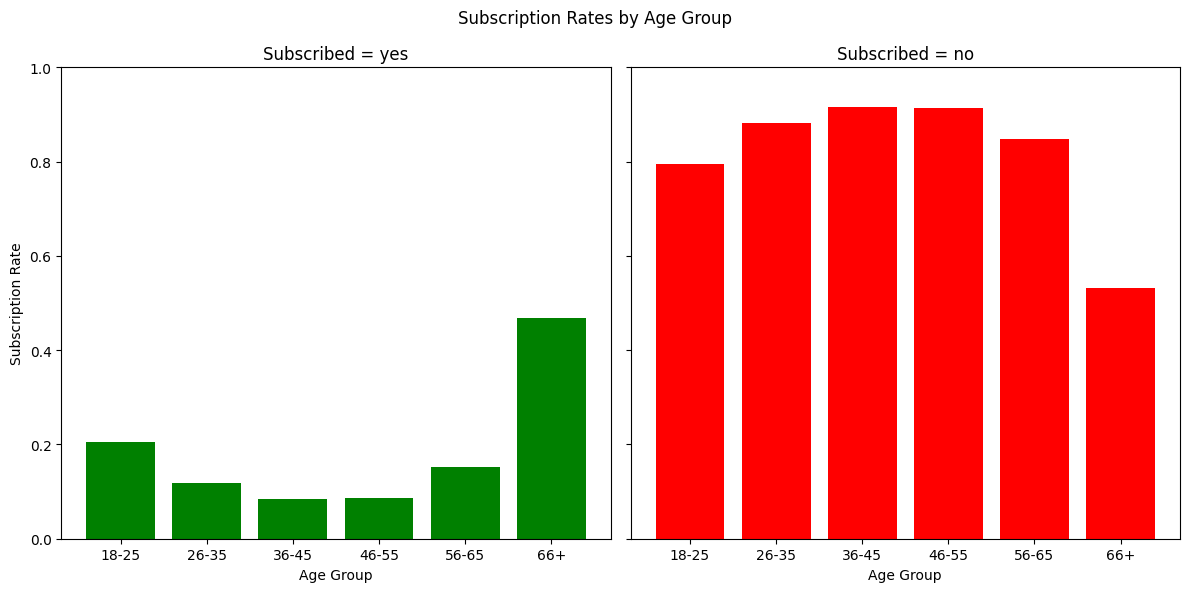

In [64]:
# Bin age into groups
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, 90], 
                         labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])

# Compute subscription rate per age group
age_rate = df.groupby('age_group')['Suscribed'].value_counts(normalize=True).unstack().fillna(0)

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Subscribed = yes
axes[0].bar(age_rate.index, age_rate['yes'], color='green')
axes[0].set_title('Subscribed = yes')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Subscription Rate')
axes[0].set_ylim(0, 1)

# Subscribed = no
axes[1].bar(age_rate.index, age_rate['no'], color='red')
axes[1].set_title('Subscribed = no')
axes[1].set_xlabel('Age Group')
axes[1].set_ylim(0, 1)

plt.suptitle('Subscription Rates by Age Group')
plt.tight_layout()
plt.show()

In [ ]:
'''1. People above the age of 60  tend to subscribe more than any other age group, marketting campaigns should be targeted towards them
also investigation must be carried out on why middle age  (35-55) don't subscribe

2. Boxplot of people who subscribed  indicates that longer call duration increases chance of subscription
3. Call duration from 0 to 1000 seconds shows linear growth in subscription rates, however from 1100 seconds upwards , there are fluctuations
this means for effective marketting, the preffered call duration should be between 500 to 1000 seconds
4. clients prefer cellular call to telephone call
5. Student , retired, and unemployed people are the top 3  job types that subscroiped, marketting should be targetd towards them , while
ways of optimising revenue should be looked at for  entreprenuer ,. services and blue collar jobs, since they are the least to subscribe
6. Most of the marketing campaigns were done in May, July, and August. 
So, even though these months had the highest subscriptions,
we can’t confidently say they are the best for marketing. 
Running the same number of campaigns in each month 
would help us see which months actually perform best. 
'''

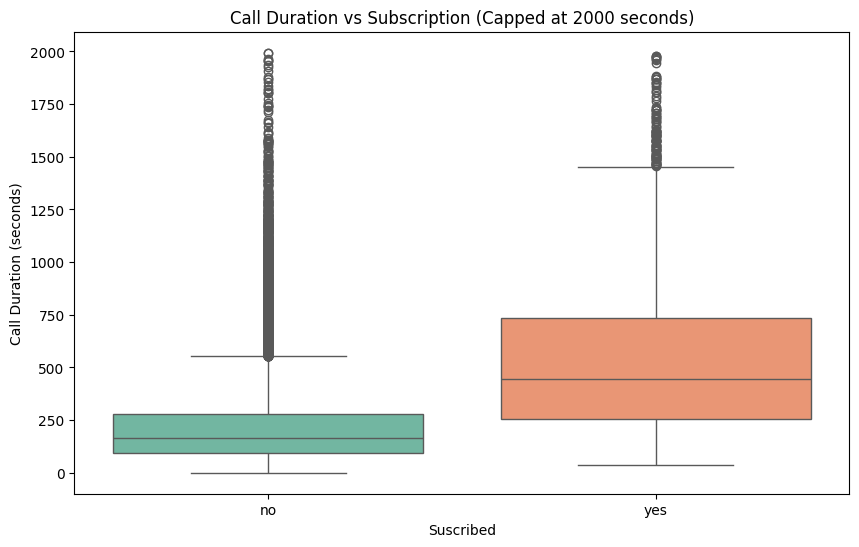

In [65]:
# Limit duration to 2000 seconds to remove extreme outliers
df_duration = df[df['duration'] < 2000]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_duration, x='Suscribed', y='duration', palette='Set2')
plt.title('Call Duration vs Subscription (Capped at 2000 seconds)')
plt.ylabel('Call Duration (seconds)')
plt.show()

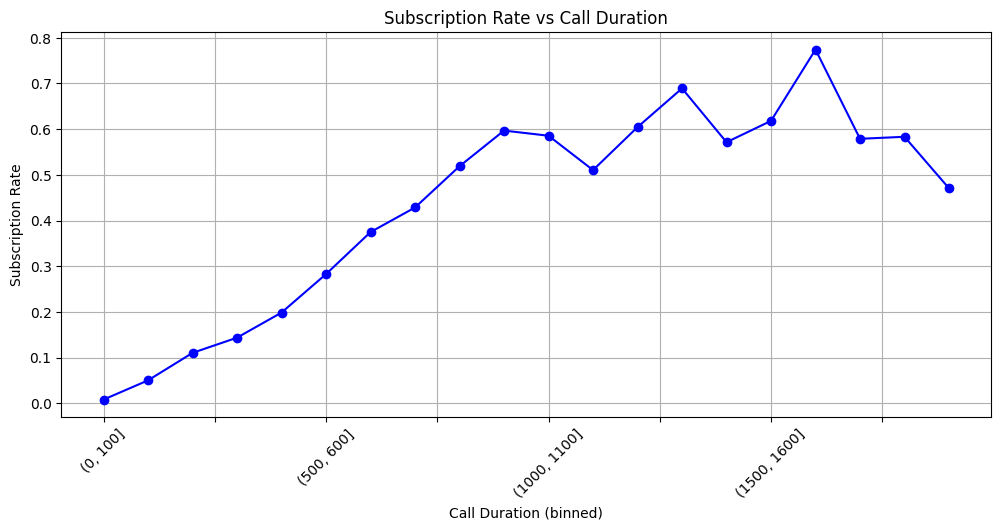

In [66]:
# Bin duration into intervals (e.g., 0–100, 100–200, etc.)
df['duration_bin'] = pd.cut(df['duration'], bins=range(0, 2100, 100))

# Compute subscription rate for each bin
duration_rate = df.groupby('duration_bin')['Suscribed'].value_counts(normalize=True).unstack().fillna(0)

# Plot the 'yes' subscription rate by duration bin
plt.figure(figsize=(12, 5))
duration_rate['yes'].plot(kind='line', marker='o', color='blue')
plt.title('Subscription Rate vs Call Duration')
plt.xlabel('Call Duration (binned)')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [67]:
for col in object_cols:
    print(col)
    print(df[col].nunique())

job
12
marital
4
education
8
default
3
housing
3
loan
3
contact
2
month
10
day_of_week
5
poutcome
3
Suscribed
2


In [68]:
df['Suscribed'].unique()


array(['no', 'yes'], dtype=object)

In [69]:
# Convert target to numeric
df['Suscribed'] = df['Suscribed'].map({'no': 0, 'yes': 1})


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             41176 non-null  object  
 2   marital         41176 non-null  object  
 3   education       41176 non-null  object  
 4   default         41176 non-null  object  
 5   housing         41176 non-null  object  
 6   loan            41176 non-null  object  
 7   contact         41176 non-null  object  
 8   month           41176 non-null  object  
 9   day_of_week     41176 non-null  object  
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  object  
 15  emp_var_rate    41176 non-null  float64 
 16  cons_price_idx  41176 non-null  float64 
 17  cons_conf_idx   4

In [71]:

# Define encoder
target_enc = ce.TargetEncoder(cols=['job', 'education'])

# Fit and transform
df[['job', 'education']] = target_enc.fit_transform(df[['job', 'education']], df['Suscribed'])


In [72]:
low_card_cols = ['marital', 'default', 'housing', 'loan', 'poutcome', 'day_of_week','contact']
df = pd.get_dummies(df, columns=low_card_cols, drop_first=True)


In [73]:
df.columns

Index(['age', 'job', 'education', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'Suscribed', 'age_group', 'duration_bin',
       'marital_married', 'marital_single', 'marital_unknown',
       'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'poutcome_nonexistent', 'poutcome_success',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'contact_telephone'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   41176 non-null  int64   
 1   job                   41176 non-null  float64 
 2   education             41176 non-null  float64 
 3   month                 41176 non-null  object  
 4   duration              41176 non-null  int64   
 5   campaign              41176 non-null  int64   
 6   pdays                 41176 non-null  int64   
 7   previous              41176 non-null  int64   
 8   emp.var.rate          41176 non-null  float64 
 9   cons.price.idx        41176 non-null  float64 
 10  cons.conf.idx         41176 non-null  float64 
 11  euribor3m             41176 non-null  float64 
 12  nr.employed           41176 non-null  float64 
 13  Suscribed             41176 non-null  int64   
 14  age_group             41133 non-null  category
 15  duratio

In [76]:


y = df['Suscribed']
X = df.drop(columns=['Suscribed','age_group','duration_bin','month'])

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X.isna().sum()



age                     0
job                     0
education               0
duration                0
campaign                0
pdays                   0
previous                0
emp_var_rate            0
cons_price_idx          0
cons_conf_idx           0
euribor3m               0
nr_employed             0
marital_married         0
marital_single          0
marital_unknown         0
default_unknown         0
default_yes             0
housing_unknown         0
housing_yes             0
loan_unknown            0
loan_yes                0
poutcome_nonexistent    0
poutcome_success        0
day_of_week_mon         0
day_of_week_thu         0
day_of_week_tue         0
day_of_week_wed         0
contact_telephone       0
dtype: int64

In [77]:
X_resampled.shape, y_resampled.shape

((73074, 28), (73074,))

In [78]:
x_train,x_val,y_train,y_val = train_test_split(X_resampled,y_resampled,test_size=0.2,stratify=y_resampled,random_state=42)


In [79]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_val)

In [80]:
F1_score = f1_score(y_val,y_pred)

In [81]:
print (f'F1 score is : {F1_score}')
print("\nClassification Report:\n", classification_report(y_val, y_pred))


F1 score is : 0.8852459016393442

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      7308
           1       0.88      0.89      0.89      7307

    accuracy                           0.89     14615
   macro avg       0.89      0.89      0.89     14615
weighted avg       0.89      0.89      0.89     14615



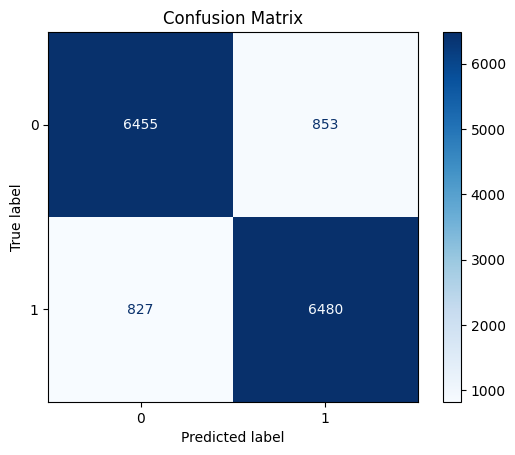

In [82]:
ConfusionMatrixDisplay.from_predictions(
    y_val,
    y_pred,
    display_labels=log_model.classes_,
    cmap=plt.cm.Blues
)
plt.title("Confusion Matrix")
plt.show()


In [83]:
rfcl = RandomForestClassifier ()
rfcl.fit(x_train,y_train)
y_prediction = rfcl.predict(x_val)

In [84]:
rfcl_f1 = f1_score(y_prediction,y_val)
rfcl_roc_score = roc_auc_score(y_val,y_prediction)
rf_accuracy = accuracy_score(y_val,y_prediction)
rf_precision  =  precision_score(y_val,y_prediction)
rf_recall = recall_score(y_val,y_prediction)

print (f'F1 score is : {rfcl_f1}')
print(f'Roc_ Score is : {rfcl_roc_score}')
print(f'The accuracy is {rf_accuracy}')
print(f"The precision is {rf_precision}")
print(f"The Recall is {rf_recall}")
print("\nClassification Report:\n", classification_report(y_val, y_prediction))



F1 score is : 0.9536736898973528
Roc_ Score is : 0.9530628307096786
The accuracy is 0.9530619226821758
The precision is 0.9413411545127316
The Recall is 0.9663336526618311

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      7308
           1       0.94      0.97      0.95      7307

    accuracy                           0.95     14615
   macro avg       0.95      0.95      0.95     14615
weighted avg       0.95      0.95      0.95     14615



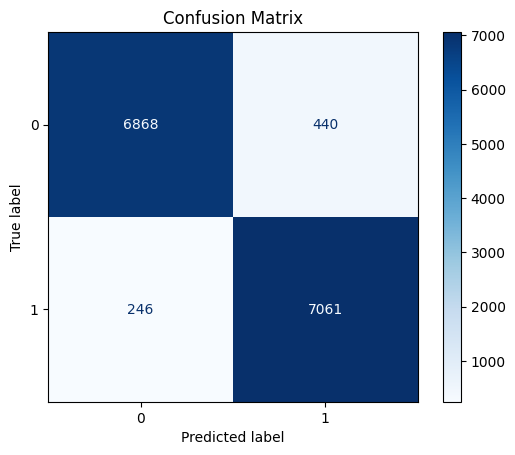

In [85]:
ConfusionMatrixDisplay.from_predictions(
    y_val,
    y_prediction,
    display_labels=rfcl.classes_,
    cmap=plt.cm.Blues
)
plt.title("Confusion Matrix")
plt.show()


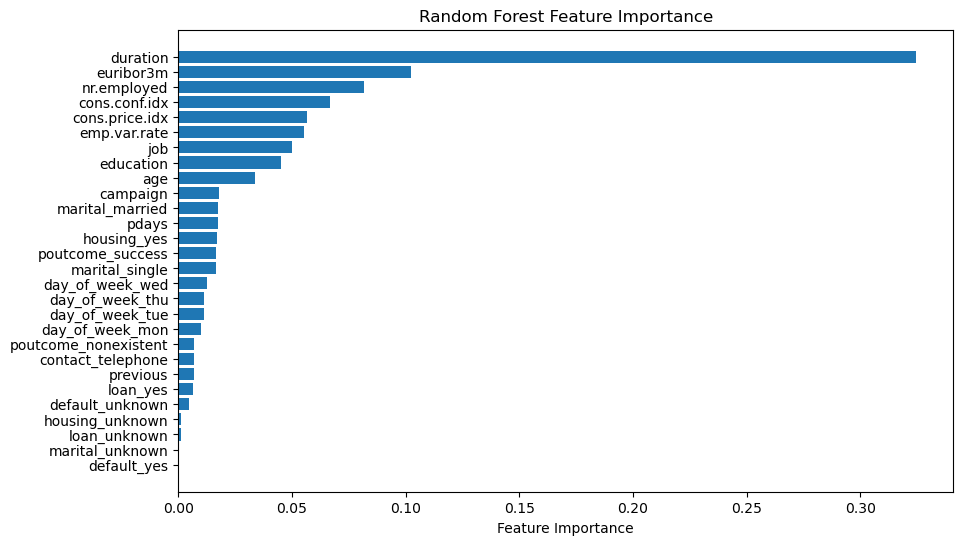

In [107]:


# Get feature importances
importances = rfcl.feature_importances_

# Get feature names (assuming your features are in X_train)
feature_names = x_train.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [86]:
x_train.columns


Index(['age', 'job', 'education', 'duration', 'campaign', 'pdays', 'previous',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'marital_married', 'marital_single', 'marital_unknown',
       'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'poutcome_nonexistent', 'poutcome_success',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'contact_telephone'],
      dtype='object')

In [87]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58459 entries, 72477 to 62690
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   58459 non-null  int64  
 1   job                   58459 non-null  float64
 2   education             58459 non-null  float64
 3   duration              58459 non-null  int64  
 4   campaign              58459 non-null  int64  
 5   pdays                 58459 non-null  int64  
 6   previous              58459 non-null  int64  
 7   emp_var_rate          58459 non-null  float64
 8   cons_price_idx        58459 non-null  float64
 9   cons_conf_idx         58459 non-null  float64
 10  euribor3m             58459 non-null  float64
 11  nr_employed           58459 non-null  float64
 12  marital_married       58459 non-null  bool   
 13  marital_single        58459 non-null  bool   
 14  marital_unknown       58459 non-null  bool   
 15  default_unknown     